**ROAD MAP**

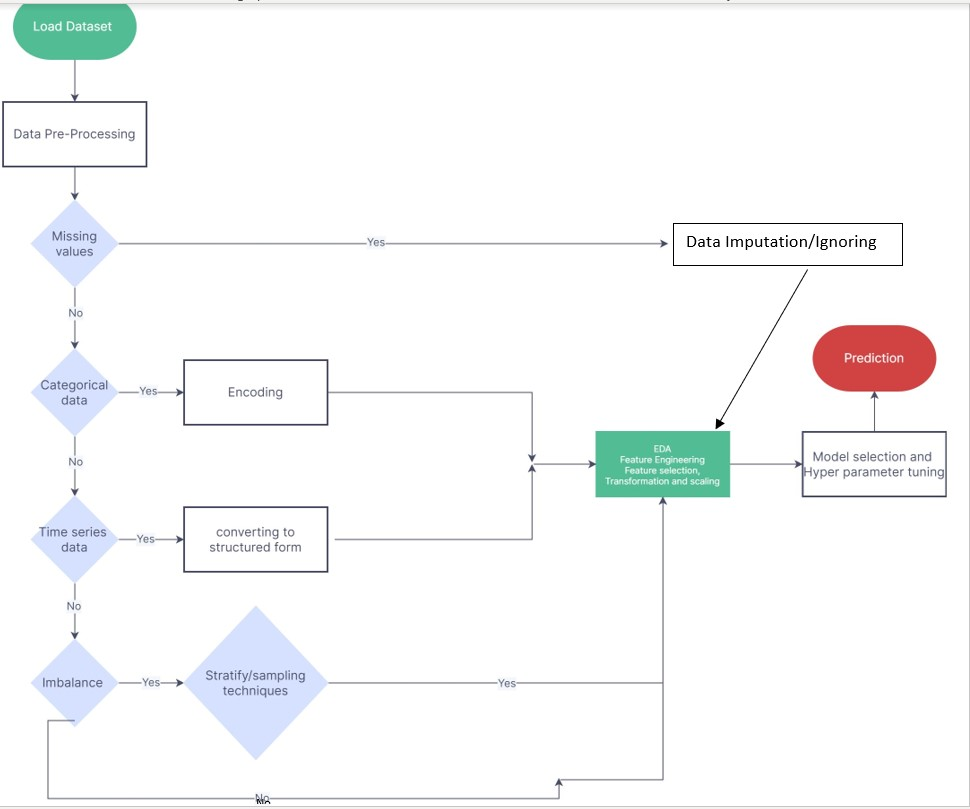

# Importing libraries and data

In [73]:
import numpy as np
import pandas as pd

In [74]:
df=pd.read_csv('/content/drive/MyDrive/DATA SETS/RIDER DRIVEN CANCELLATION.csv')
df.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,26-01-2021 02:21,556753,26-01-2021 00:00,26-01-2021 02:21,26-01-2021 02:22,26-01-2021 02:32,26-01-2021 02:49,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,26-01-2021 02:33,556754,26-01-2021 00:00,26-01-2021 02:33,26-01-2021 02:34,26-01-2021 02:50,26-01-2021 03:11,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,26-01-2021 02:39,556755,26-01-2021 00:00,26-01-2021 02:39,26-01-2021 02:40,26-01-2021 02:56,26-01-2021 03:12,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,26-01-2021 02:47,556756,26-01-2021 00:00,26-01-2021 02:48,26-01-2021 02:49,26-01-2021 03:21,26-01-2021 03:41,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,26-01-2021 03:06,556757,26-01-2021 00:00,26-01-2021 03:07,26-01-2021 03:07,26-01-2021 03:31,26-01-2021 04:00,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [75]:
test_data=pd.read_csv('/content/drive/MyDrive/DATA SETS/rider cancellation test data.csv')
test_data.head()

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time
0,06-02-2021 10:03,130231,06-02-2021 00:00,06-02-2021 10:03,06-02-2021 10:04,12884,1.6585,4.54,216.0,215.0,1.0,747.0,NaN,NaN,NaN,273.400000
1,06-02-2021 10:03,130232,06-02-2021 00:00,06-02-2021 10:03,06-02-2021 10:03,3541,2.0709,5.84,52.0,52.0,0.0,75.0,NaN,NaN,NaN,252.100000
2,06-02-2021 10:03,130233,06-02-2021 00:00,06-02-2021 10:04,06-02-2021 10:05,603,1.3884,0.99,289.0,289.0,0.0,2214.0,NaN,NaN,NaN,241.383333
3,06-02-2021 10:03,130234,06-02-2021 00:00,06-02-2021 10:03,06-02-2021 10:03,3414,1.9039,2.59,125.0,122.0,3.0,1020.0,NaN,NaN,NaN,291.933333
4,06-02-2021 10:03,130235,06-02-2021 00:00,06-02-2021 10:03,06-02-2021 10:04,1426,0.8275,0.94,352.0,350.0,2.0,7284.0,NaN,NaN,NaN,247.133333


order_id : unique id for each order

order_time: time of the creation of order by the client

order_date : date of the order

allot_time: time of allocation of order to the rider

accept_time: time of acceptance of the order by the rider (if available)

pickup_time: time of pickup of the order (if available)

delivered_time: time of delivery of the order (if available)

cancelled_time: time of cancellation of order (if the order was cancelled)

cancelled: whether the order was cancelled

rider_id: unique id for each rider

first_mile_distance: road distance from rider’s location to the pickup location

last_mile_distance: road distance from pickup location to the delivery location

allotted_orders: total number of orders allotted to the rider in the 30 days before (not including) order_date

delivered_orders: total number of orders delivered by the rider in the 30 days before (not including) order_date

undelivered_orders: total number of orders allotted to but not delivered by the rider (i.e. cancelled) in the 30 days before (not including) order_date

lifetime_order_count: total number of orders delivered by the rider at any time before order_date

reassigned_order: whether the order was reassigned to this rider

reassignment_method: if the order was reassigned, whether the reassignment was done manually (by the ops team) or automatically

reassignment_reason: a more detailed reason for the reassignment

session_time: total time the rider had been online on order_date before order_time

In [76]:
df.dtypes

order_time               object
order_id                  int64
order_date               object
allot_time               object
accept_time              object
pickup_time              object
delivered_time           object
rider_id                  int64
first_mile_distance     float64
last_mile_distance      float64
alloted_orders          float64
delivered_orders        float64
cancelled                 int64
undelivered_orders      float64
lifetime_order_count    float64
reassignment_method      object
reassignment_reason      object
reassigned_order        float64
session_time            float64
cancelled_time           object
dtype: object

In [77]:
test_data.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                 68
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders            4773
delivered_orders          4884
undelivered_orders        4884
lifetime_order_count       778
reassignment_method     140212
reassignment_reason     140209
reassigned_order        140209
session_time              5054
dtype: int64

In [78]:
df1=df.drop(['pickup_time','delivered_time','cancelled_time'],axis=1)
#These columns were dropped as they are not present in test dataframe.
df1.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                157
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
cancelled                    0
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
dtype: int64

# **feature engineering**

In [79]:
# Library for manipulating dates and times
from datetime import datetime
from datetime import timedelta
def parse_dates(df1):
  df1["order_date"] = pd.to_datetime(df1["order_date"])
  df1["order_time"] = pd.to_datetime(df1["order_time"])
  df1["allot_time"] = pd.to_datetime(df1["allot_time"])
  df1["accept_time"] = pd.to_datetime(df1["accept_time"])
  return df1

train = parse_dates(df1)
test = parse_dates(test_data)

In [80]:
train['accept_order_diff'] = (train['accept_time'] - train['order_time']).dt.total_seconds()
test['accept_order_diff'] = (test['accept_time'] - test['order_time']).dt.total_seconds()
train['total_dist'] = train.first_mile_distance + train.last_mile_distance
test['total_dist'] = test.first_mile_distance + test.last_mile_distance

In [81]:
#filling missing values
train.reassigned_order = train['reassigned_order'].fillna(value = 0)
test.reassigned_order = test['reassigned_order'].fillna(value = 0)
train.reassignment_method = train.reassignment_method.fillna(value = 'none')
test.reassignment_method = test.reassignment_method.fillna(value = 'none')
train.reassignment_reason = train.reassignment_reason.fillna(value = 'none')
test.reassignment_reason = test.reassignment_reason.fillna(value = 'none')
train.lifetime_order_count = train.lifetime_order_count.fillna(0)
test.lifetime_order_count = test.lifetime_order_count.fillna(0)

In [82]:
#filling missing values
train.delivered_orders = train.delivered_orders.fillna(0)
train.undelivered_orders = train.undelivered_orders.fillna(0)
train.alloted_orders = train.alloted_orders.fillna(0)
test.delivered_orders = test.delivered_orders.fillna(0)
test.undelivered_orders = test.undelivered_orders.fillna(0)
test.alloted_orders = test.alloted_orders.fillna(0)
train.session_time = train.session_time.fillna(train.session_time.median())
test.session_time = test.session_time.fillna(test.session_time.median())
train.accept_order_diff = train.accept_order_diff.fillna(-1)
test.accept_order_diff = test.accept_order_diff.fillna(-1)

In [83]:
#This feature tells if the accept time is null, that means the order wasn't accepted by the rider
def cancel_before_accept(row):
    if pd.isna(row['accept_time']):
        return 1
    return 0

train['cancel_before_accept'] = train.apply(cancel_before_accept, axis=1)
test['cancel_before_accept'] = test.apply(cancel_before_accept, axis = 1)

{'boxes': [<matplotlib.lines.Line2D at 0x7f3a129f38d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3a1f07ee10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3a1f08be50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3a1f08b910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3a1f07e390>,
  <matplotlib.lines.Line2D at 0x7f3a1f07e8d0>]}

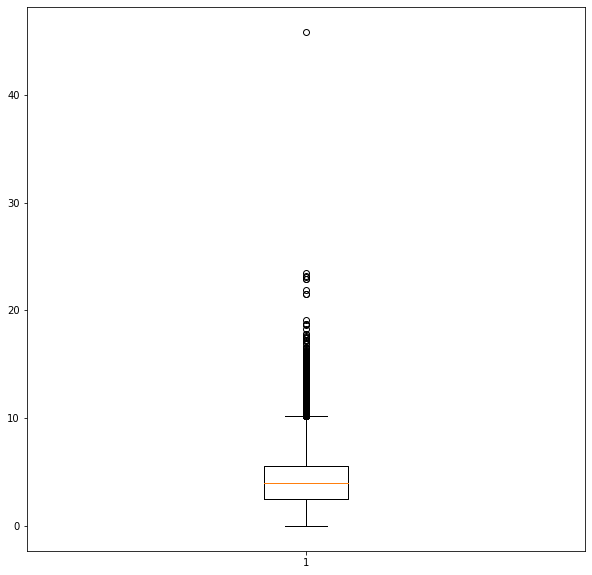

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
plt.boxplot(train["total_dist"])

In [85]:
#seperating outliers
def large_dist(row):
    if row.total_dist > 10:
        return 1
    return 0

train['large_dist'] = train.apply(large_dist, axis=1)
test['large_dist'] = test.apply(large_dist, axis=1)
train['weekday'] = train.order_date.dt.weekday
test['weekday'] = test.order_date.dt.weekday

In [86]:
train['delivered_fraction'] = train.delivered_orders / train.alloted_orders
test['delivered_fraction'] = test.delivered_orders / test.alloted_orders
train.delivered_fraction = train.delivered_fraction.fillna(0)
test.delivered_fraction = test.delivered_fraction.fillna(0)

In [88]:
train.shape

(450000, 23)

In [89]:
test.shape

(144844, 22)

In [90]:
hours = train['order_time'].dt.hour
train['hours'] = hours
hours_test = test['order_time'].dt.hour
test['hours'] = hours_test
train['month'] = train['order_date'].dt.month
test['month'] = test['order_date'].dt.month

In [91]:
# Defined a function to define the part of the day when the followwing events took place
def daypart(hour):
    if hour in [6,7,8,9,10]:
        return "morning"
    elif hour in [14,11,12,13]:
        return "noon"
    elif hour in [15,16,17,18]:
        return "afternoon"
    else: return "night"
dayparts = hours.apply(daypart)
train['dayparts'] = dayparts
dayparts_test = hours_test.apply(daypart)
test['dayparts'] = dayparts_test

In [92]:
train.head()

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,...,session_time,accept_order_diff,total_dist,cancel_before_accept,large_dist,weekday,delivered_fraction,hours,month,dayparts
0,2021-01-26 02:21:00,556753,2021-01-26,2021-01-26 02:21:00,2021-01-26 02:22:00,11696,1.5666,2.65,46.0,46.0,...,175.550000,60.0,4.2166,0,0,1,1.0,2,1,night
1,2021-01-26 02:33:00,556754,2021-01-26,2021-01-26 02:33:00,2021-01-26 02:34:00,18117,2.5207,2.76,8.0,8.0,...,3.266667,60.0,5.2807,0,0,1,1.0,2,1,night
2,2021-01-26 02:39:00,556755,2021-01-26,2021-01-26 02:39:00,2021-01-26 02:40:00,18623,2.2074,4.80,1.0,1.0,...,9.816667,60.0,7.0074,0,0,1,1.0,2,1,night
3,2021-01-26 02:47:00,556756,2021-01-26,2021-01-26 02:48:00,2021-01-26 02:49:00,15945,2.1894,6.38,1.0,1.0,...,17.533333,120.0,8.5694,0,0,1,1.0,2,1,night
4,2021-01-26 03:06:00,556757,2021-01-26,2021-01-26 03:07:00,2021-01-26 03:07:00,17589,2.7870,4.01,34.0,34.0,...,1.350000,60.0,6.7970,0,0,1,1.0,3,1,night


In [93]:
train.duplicated().sum()

1

In [94]:
train=train.drop_duplicates()
train.duplicated().sum()

0

In [95]:
train['day'] = train['order_date'].dt.day_name()
train['is_weekend'] = train['day'].apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)
train['day'] = train['day'].map({'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6})
test['day'] = test['order_date'].dt.day_name()
test['is_weekend'] = test['day'].apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)
test['day'] = test['day'].map({'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [96]:
train['reassignment_reason'].unique()

array(['none', 'Reassignment Request from SE portal.',
       'Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket',
       'Reassign'], dtype=object)

In [97]:
train['reassignment_method'] = train['reassignment_method'].map({'none':0,'auto':1,'manual':2})
train['reassignment_reason'] = train['reassignment_reason'].map({'none':0,
                                                                 'Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket':1,
                                                                 'Reassign':2,'Reassignment Request from SE portal.':3})
test['reassignment_method'] = test['reassignment_method'].map({'none':0,'auto':1,'manual':2})
test['reassignment_reason'] = test['reassignment_reason'].map({'none':0,
                                                                 'Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket':1,
                                                                 'Reassign':2,'Reassignment Request from SE portal.':3})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [98]:
train['allot_delay'] = (train['allot_time'] - train['order_time']).dt.total_seconds()
test['allot_delay'] = (test['allot_time'] - test['order_time']).dt.total_seconds()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
#A feature to store if this is the first order of the rider
def lifetime_order_count_zero(row):
    if row['lifetime_order_count'] == 0:
        return 1
    return 0

train['lifetime_order_count_zero'] = train.apply(lifetime_order_count_zero,axis=1)
test['lifetime_order_count_zero'] = test.apply(lifetime_order_count_zero,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [106]:
train['dayparts'] = train['dayparts'].map({'morning':0,'noon':1,'afternoon':2,'night':3})
test['dayparts'] = test['dayparts'].map({'morning':0,'noon':1,'afternoon':2,'night':3})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
train.dtypes

order_time                   datetime64[ns]
order_id                              int64
order_date                   datetime64[ns]
allot_time                   datetime64[ns]
accept_time                  datetime64[ns]
rider_id                              int64
first_mile_distance                 float64
last_mile_distance                  float64
alloted_orders                      float64
delivered_orders                    float64
cancelled                             int64
undelivered_orders                  float64
lifetime_order_count                float64
reassignment_method                   int64
reassignment_reason                   int64
reassigned_order                    float64
session_time                        float64
accept_order_diff                   float64
total_dist                          float64
cancel_before_accept                  int64
large_dist                            int64
weekday                               int64
delivered_fraction              

In [108]:
numeric_cols = [   
'rider_id',                       
'first_mile_distance',            
'last_mile_distance',            
'lifetime_order_count',           
'alloted_orders',                 
'delivered_orders',               
'session_time','total_dist','accept_order_diff','allot_delay'
]
categorical_cols = [
'rider_id',                      
'undelivered_orders',                      
'reassigned_order','reassignment_method','large_dist', 'delivered_fraction','dayparts',   
'reassignment_reason','day','is_weekend','cancel_before_accept','lifetime_order_count_zero']
numeric_df = train[numeric_cols]
categorical = train[categorical_cols]
numeric_test = test[numeric_cols]
categorical_test= test[categorical_cols]

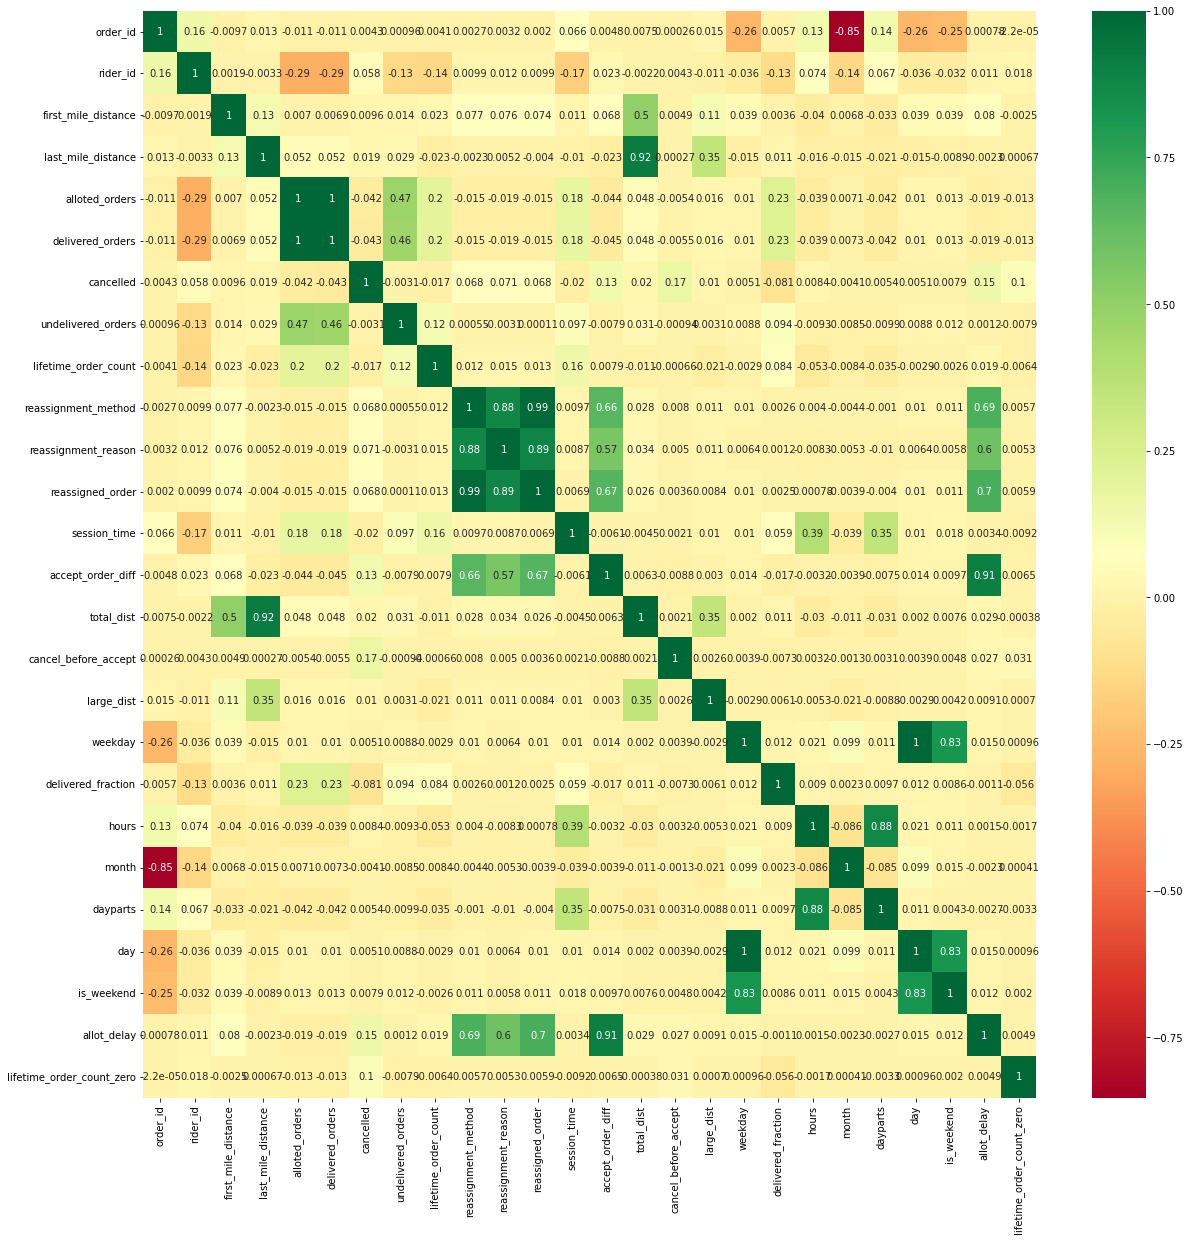

In [112]:
plt.figure(figsize=(20,20))
p=sns.heatmap(train.corr(), annot=True,cmap ='RdYlGn')

In [109]:
numeric_df

,rider_id,first_mile_distance,last_mile_distance,lifetime_order_count,alloted_orders,delivered_orders,session_time,total_dist,accept_order_diff,allot_delay
0,11696,1.5666,2.65,621.0,46.0,46.0,175.550000,4.2166,60.0,0.0
1,18117,2.5207,2.76,105.0,8.0,8.0,3.266667,5.2807,60.0,0.0
2,18623,2.2074,4.80,66.0,1.0,1.0,9.816667,7.0074,60.0,0.0
3,15945,2.1894,6.38,127.0,1.0,1.0,17.533333,8.5694,120.0,60.0
4,17589,2.7870,4.01,84.0,34.0,34.0,1.350000,6.7970,60.0,60.0
...,...,...,...,...,...,...,...,...,...,...
449995,1006,0.5789,0.19,127.0,4.0,4.0,369.516667,0.7689,60.0,0.0
449996,279,1.9863,1.19,105.0,81.0,81.0,239.133333,3.1763,60.0,0.0
449997,3161,1.5944,1.61,1488.0,28.0,28.0,204.150000,3.2044,60.0,60.0
449998,9396,2.8939,4.68,105.0,72.0,72.0,65.583333,7.5739,120.0,0.0


In [147]:
categorical

,rider_id,undelivered_orders,reassigned_order,reassignment_method,large_dist,delivered_fraction,dayparts,reassignment_reason,day,is_weekend,cancel_before_accept,lifetime_order_count_zero
0,11696,0.0,0.0,0,0,1.0,3,0,1,0,0,0
1,18117,0.0,0.0,0,0,1.0,3,0,1,0,0,0
2,18623,0.0,0.0,0,0,1.0,3,0,1,0,0,0
3,15945,0.0,0.0,0,0,1.0,3,0,1,0,0,0
4,17589,0.0,0.0,0,0,1.0,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
449995,1006,0.0,0.0,0,0,1.0,0,0,2,0,0,0
449996,279,0.0,0.0,0,0,1.0,0,0,2,0,0,0
449997,3161,0.0,0.0,0,0,1.0,0,0,2,0,0,0
449998,9396,0.0,0.0,0,0,1.0,0,0,2,0,0,0


In [176]:
agg = numeric_df.groupby('rider_id').mean()
cat = categorical.groupby('rider_id').mean()
agg1 = numeric_test.groupby('rider_id').mean()
cat1 = categorical_test.groupby('rider_id').mean()

In [177]:
def set_col_index(df):
  columns=df.columns.to_series()
  c=columns.apply(lambda x: x+'_mean')
  c=c.reset_index()
  df.columns=c[0]
  return df.columns

In [178]:
agg.columns=set_col_index(agg)
cat.columns=set_col_index(cat)
agg1.columns=set_col_index(agg1)
cat1.columns=set_col_index(cat1)
agg=agg.reset_index()
cat=cat.reset_index()
agg1=agg1.reset_index()
cat1=cat1.reset_index()

In [179]:
#dropping useless features
train = train.drop(['order_time','order_date','allot_time','accept_time'],axis = 'columns')
train = train.merge(agg,how = 'left', on = 'rider_id')
train = train.merge(cat,how = 'left', on = 'rider_id')
train.drop(['order_id','rider_id'],axis=1,inplace=True)

test = test.drop(['order_time','order_date','allot_time','accept_time'],axis = 'columns')
test = test.merge(agg1,how = 'left', on = 'rider_id')
test = test.merge(cat1,how = 'left', on = 'rider_id')
test.drop(['order_id','rider_id'],axis=1,inplace=True)

In [180]:
train.head()

,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,...,reassigned_order_mean,reassignment_method_mean,large_dist_mean,delivered_fraction_mean,dayparts_mean,reassignment_reason_mean,day_mean,is_weekend_mean,cancel_before_accept_mean,lifetime_order_count_zero_mean
0,1.5666,2.65,46.0,46.0,0,0.0,621.0,0,0,0.0,...,0.000000,0.000000,0.0,1.0,2.500000,0.00,1.125000,0.000000,0.0,0.0
1,2.5207,2.76,8.0,8.0,0,0.0,105.0,0,0,0.0,...,0.083333,0.083333,0.0,1.0,0.583333,0.25,2.500000,0.166667,0.0,0.0
2,2.2074,4.80,1.0,1.0,0,0.0,66.0,0,0,0.0,...,0.000000,0.000000,0.0,1.0,1.133333,0.00,2.666667,0.066667,0.0,0.0
3,2.1894,6.38,1.0,1.0,0,0.0,127.0,0,0,0.0,...,0.000000,0.000000,0.0,1.0,1.531250,0.00,2.656250,0.187500,0.0,0.0
4,2.7870,4.01,34.0,34.0,0,0.0,84.0,0,0,0.0,...,0.000000,0.000000,0.0,1.0,0.928571,0.00,3.857143,0.714286,0.0,0.0


In [181]:
test.head()

,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,...,reassigned_order_mean,reassignment_method_mean,large_dist_mean,delivered_fraction_mean,dayparts_mean,reassignment_reason_mean,day_mean,is_weekend_mean,cancel_before_accept_mean,lifetime_order_count_zero_mean
0,1.6585,4.54,216.0,215.0,1.0,747.0,0,0,0.0,273.400000,...,0.000000,0.000000,0.000000,0.995370,0.000000,0.0000,2.000000,0.0,0.0,0.0
1,2.0709,5.84,52.0,52.0,0.0,75.0,0,0,0.0,252.100000,...,0.000000,0.000000,0.111111,1.000000,0.925926,0.0000,1.777778,0.0,0.0,0.0
2,1.3884,0.99,289.0,289.0,0.0,2214.0,0,0,0.0,241.383333,...,0.000000,0.000000,0.000000,1.000000,0.461538,0.0000,3.000000,0.0,0.0,0.0
3,1.9039,2.59,125.0,122.0,3.0,1020.0,0,0,0.0,291.933333,...,0.107143,0.107143,0.000000,0.976328,0.785714,0.2500,2.428571,0.0,0.0,0.0
4,0.8275,0.94,352.0,350.0,2.0,7284.0,0,0,0.0,247.133333,...,0.062500,0.062500,0.000000,0.994282,0.656250,0.0625,2.750000,0.0,0.0,0.0


# splitting

In [182]:
y = train.cancelled
X = train.drop('cancelled', axis = 1)

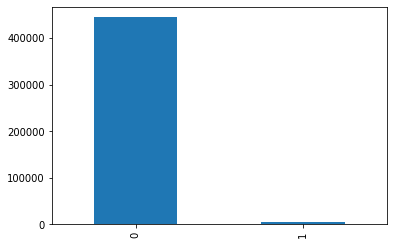

In [183]:
y.value_counts().plot(kind='bar')

In [184]:
#ADASYN
import collections as k
from imblearn.over_sampling import ADASYN
X_ada, y_ada  = ADASYN().fit_resample(X, y)
print('Original dataset shape', k.Counter(y))
print('Resample dataset shape', k.Counter(y_ada))

Original dataset shape Counter({0: 444782, 1: 5217})
Resample dataset shape Counter({0: 444782, 1: 443620})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


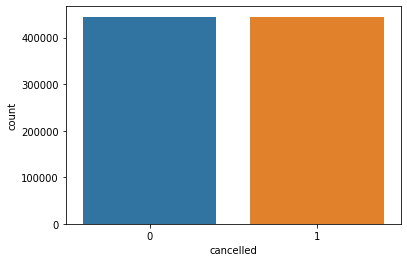

In [185]:
sns.countplot(y_ada)

# XGBOOST

In [187]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

model = XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)

params = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
               "min_child_weight" : [ 1, 3, 5, 7 ],
                "colsample_bytree" : [ 0.3, 0.4, 0.5 ,0.55,0.6, 0.7 ],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

random_search=RandomizedSearchCV(model,param_distributions=params,
                                 n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [189]:
random_search.fit(X_ada, y_ada)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(eval_metric='auc',
                                           grow_policy='lossguide',
                                           tree_method='hist',
                                           use_label_encoder=False),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.55, 0.6, 0.7],
                                        'gamma': [0, 0.1, 0.2, 0.4, 0.8, 1.6,
                                                  3.2, 6.4, 12.8, 25.6, 51.2,
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25, 0.3,
                                                          0.4, 0.5, 0.6, 0.7],
                                        'max_depth': [5, 6, 

In [191]:
test_pred=random_search.predict(test)

In [199]:
unique, counts = np.unique(test_pred, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[     0 143242]
 [     1   1602]]
